### Exercises
#### Spam Data
###### 1. Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

###### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

###### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import user, password, host
from wrangle import get_db_url, basic_clean, clean
from wordcloud import WordCloud

In [2]:
df = pd.read_sql('SELECT * FROM spam', get_db_url("spam_db"), index_col="id")
df

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


In [3]:
#df.to_csv('spam.csv')

###### 1.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [4]:
ham = clean(' '.join(df[df.label == 'ham']['text']))
spam = clean(' '.join(df[df.label == 'spam']['text']))
words = clean(' '.join(df['text']))

In [5]:
ham_freq = pd.Series(ham).value_counts()
spam_freq = pd.Series(spam).value_counts()
all_freq = pd.Series(words).value_counts()

###### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [6]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,458,13,471
get,314,83,397
2,305,173,478
ltgt,276,0,276


In [7]:
word_counts.sample(5)

,ham,spam,all
minapn,0,1,1
nevr,1,0,1
wrc,0,2,2
241,0,1,1
younger,1,0,1


In [8]:
word_counts.sort_values('all', ascending=False)

,ham,spam,all
u,1027,155,1182
call,241,359,600
2,305,173,478
im,458,13,471
get,314,83,397
...,...,...,...
uncountable,1,0,1
woohoo,1,0,1
weighed,1,0,1
sounding,1,0,1


In [9]:
word_counts.sort_values('ham', ascending=False)

,ham,spam,all
u,1027,155,1182
im,458,13,471
get,314,83,397
2,305,173,478
ltgt,276,0,276
...,...,...,...
php,0,2,2
88222,0,2,2
getstop,0,2,2
020903,0,2,2


In [10]:
word_counts.sort_values('spam', ascending=False)

,ham,spam,all
call,241,359,600
free,59,216,275
2,305,173,478
u,1027,155,1182
txt,13,150,163
...,...,...,...
guessed,1,0,1
itxx,1,0,1
beside,1,0,1
steve,1,0,1


###### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

<AxesSubplot:>

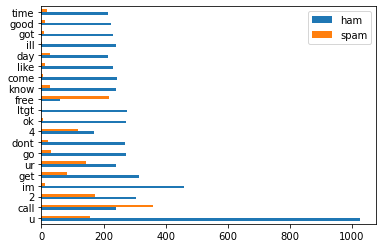

In [11]:
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh()

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

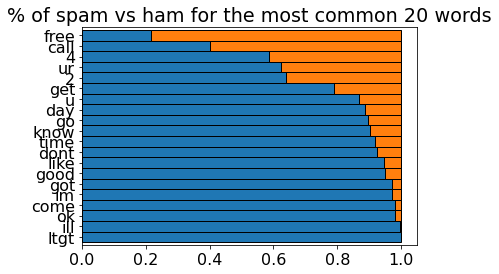

In [12]:

plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of spam vs ham for the most common 20 words')